[Kaggle dataset](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting)

# Stores CSV

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pyarrow as pa

df_stores = pd.read_csv('stores.csv')
print(df_stores.head())


   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [ ]:
df_stores.info()
print(df_stores.describe())
print(df_stores["Type"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000
Type
A    22
B    17
C     6
Name: count, dtype: int64


: 

<Axes: xlabel='Type', ylabel='Size'>

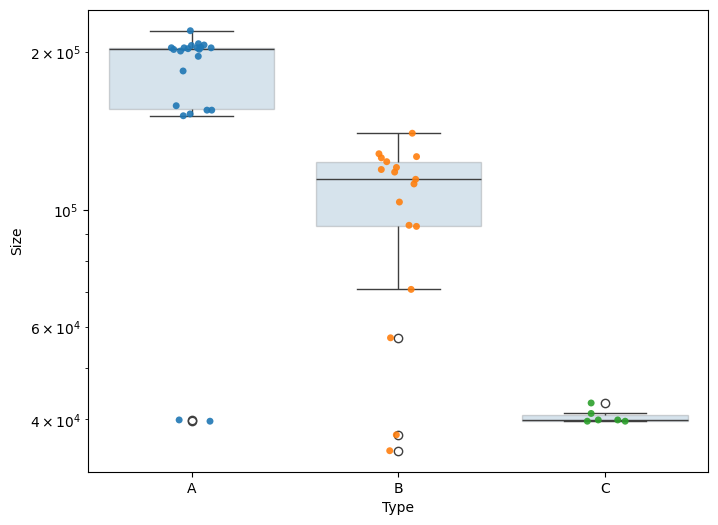

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(data=df_stores, x="Type", y="Size", ax=ax, boxprops=dict(alpha=0.2), log_scale=True)
sns.stripplot(data=df_stores, x="Type", y="Size", ax=ax, hue="Type", alpha=0.9, log_scale=True)

<Axes: xlabel='Type', ylabel='Store'>

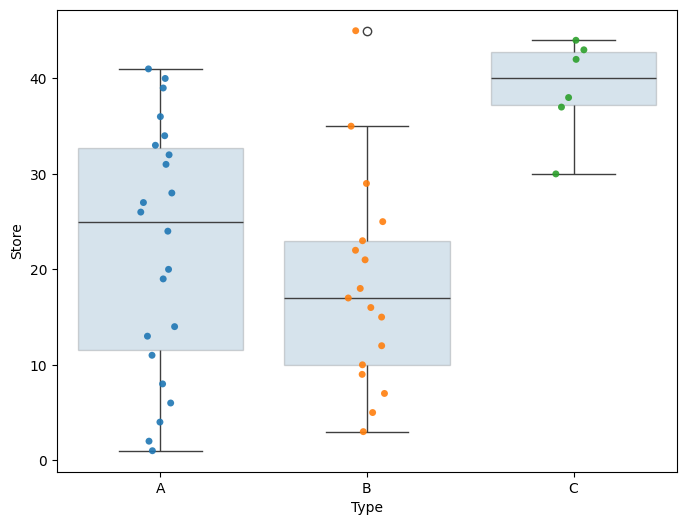

: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(data=df_stores, x="Type", y="Store", ax=ax, boxprops=dict(alpha=0.2))
sns.stripplot(data=df_stores, x="Type", y="Store", ax=ax, hue="Type", alpha=0.9)

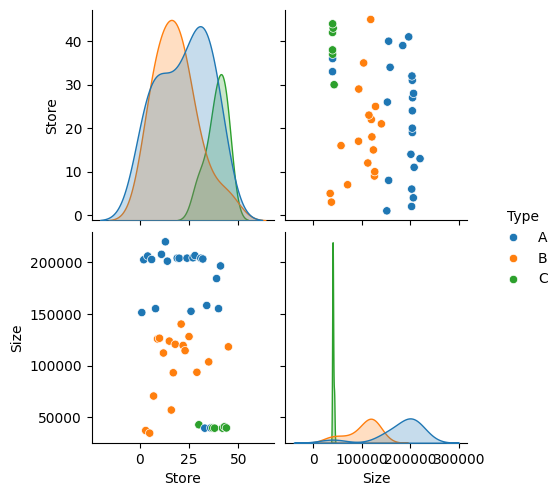

: 

In [ ]:
sns.pairplot(df_stores, hue="Type")

# Train CSV

In [24]:
df_train = pd.read_csv('train.csv')
print(df_train.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


: 

<Axes: >

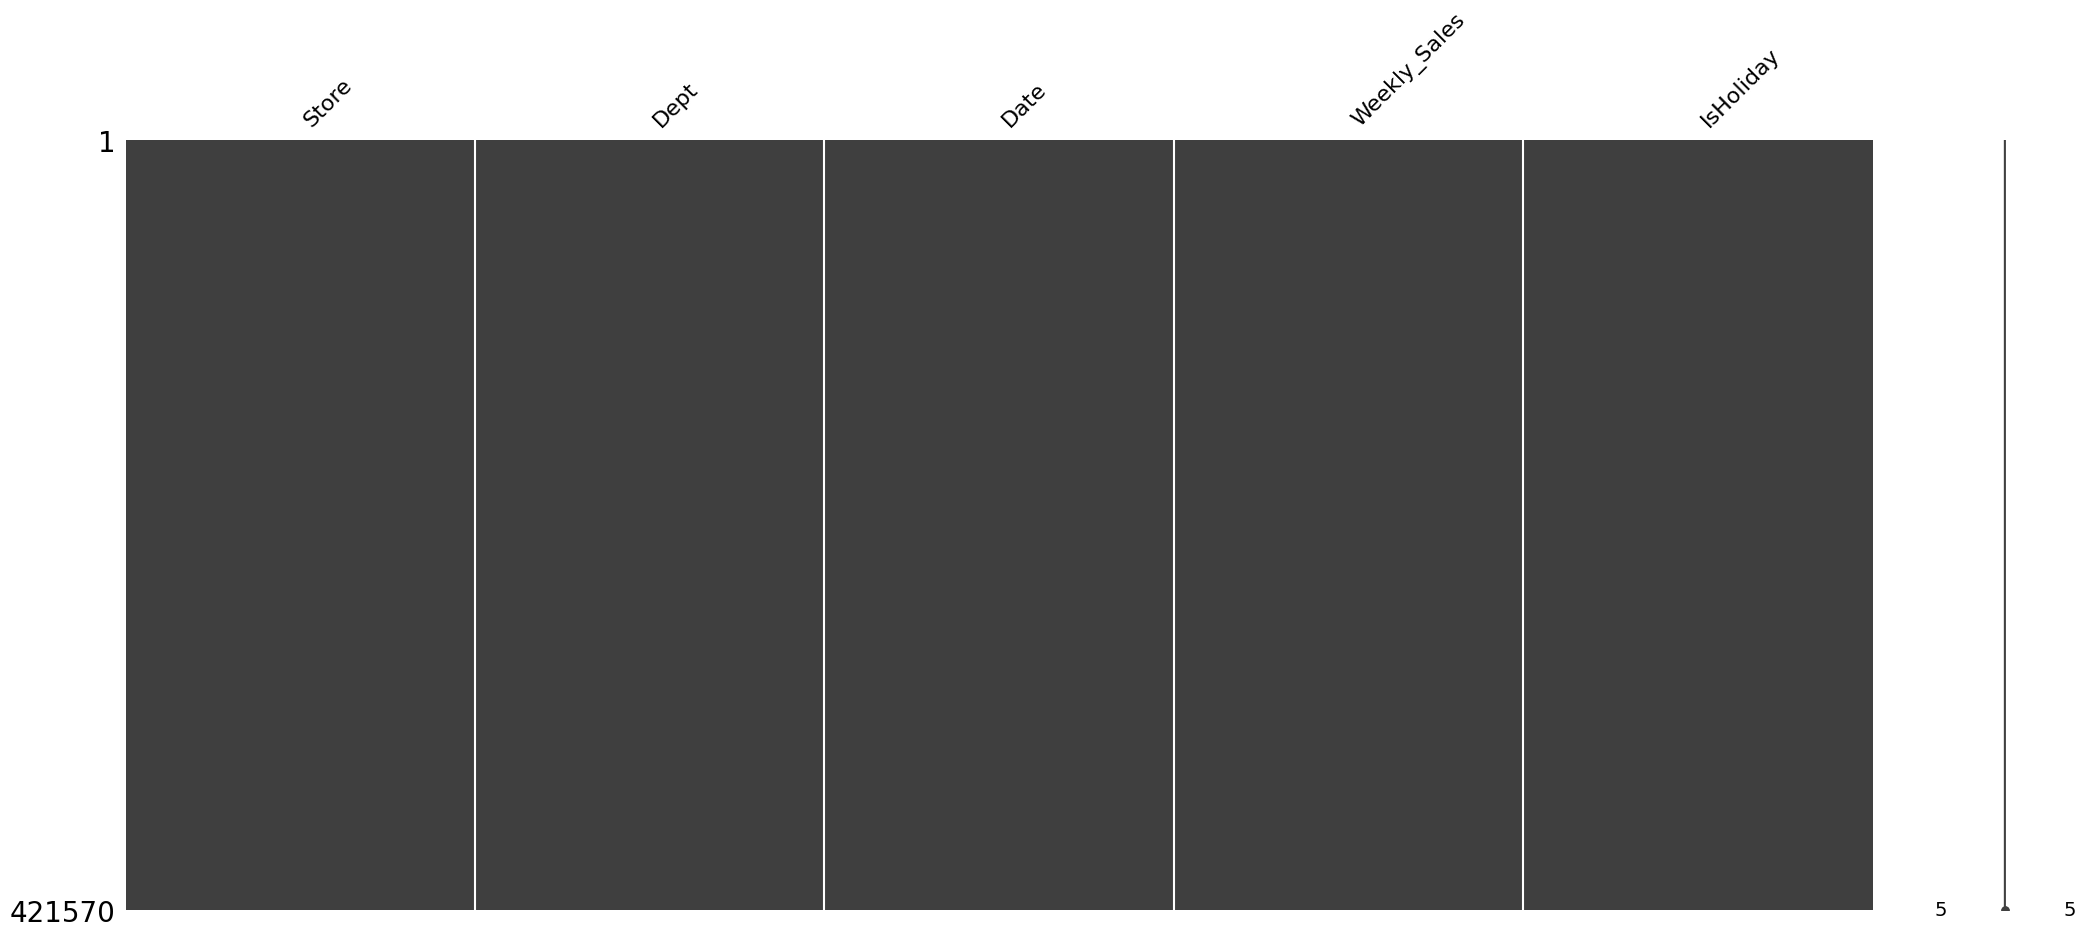

: 

In [ ]:
msno.matrix(df_train)

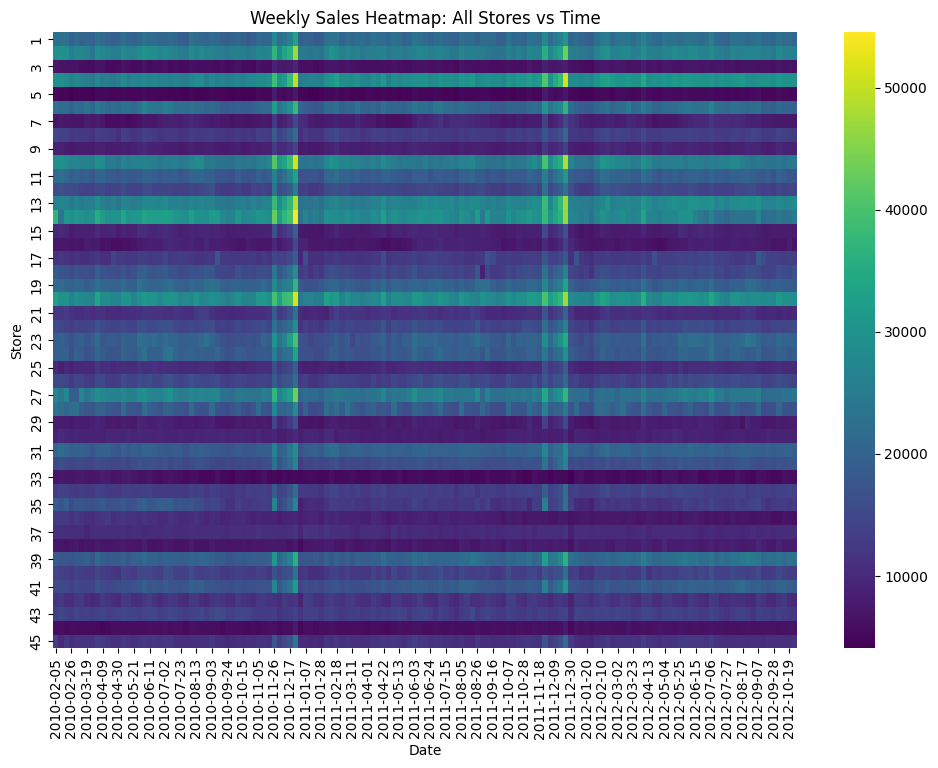

: 

In [ ]:
df_pivot = df_train.pivot_table(index="Store", columns="Date", values="Weekly_Sales")

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_pivot, cmap="viridis", ax=ax)

plt.title("Weekly Sales Heatmap: All Stores vs Time")
plt.show()

In [ ]:
df_subset = df_train[(df_train["Store"] == 1 ) & (df_train["Dept"] == 1)]

fig,ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=df_subset, x="Date", y="Weekly_Sales", ax=ax)

df_climatology = df_train.groupby("Date")["Weekly_Sales"].mean().reset_index().rename(columns={"Weekly_Sales": "Climatology"})

df_plot = pd.merge(df_subset, df_climatology, on="Date")

df_plot["Anomaly"] = df_plot["Weekly_Sales"] - df_plot["Climatology"]

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=df_plot, x="Date", y="Anomaly", ax=ax)
plt.title("Sales Anomaly for Store 1, Dept 1")


: 

In [ ]:
df_plot

,Store,Dept,Date,Weekly_Sales,IsHoliday,Climatology,Anomaly
0,1,1,2010-02-05,24924.50,False,16836.121997,8088.378003
1,1,1,2010-02-12,46039.49,True,16352.056032,29687.433968
2,1,1,2010-02-19,41595.55,False,16216.658979,25378.891021
3,1,1,2010-02-26,19403.54,False,14899.549688,4503.990312
4,1,1,2010-03-05,21827.90,False,15921.015727,5906.884273
...,...,...,...,...,...,...,...
138,1,1,2012-09-28,18947.81,False,14765.327279,4182.482721
139,1,1,2012-10-05,21904.47,False,15983.413747,5921.056253
140,1,1,2012-10-12,22764.01,False,15427.596739,7336.413261
141,1,1,2012-10-19,24185.27,False,15295.732397,8889.537603


: 

# Test CSV

In [25]:
df_test = pd.read_csv('test.csv')
print(df_test.head())

   Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


: 

# Features CSV

In [26]:
df_features = pd.read_csv('features.csv')
print(df_features.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [28]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


<Axes: >

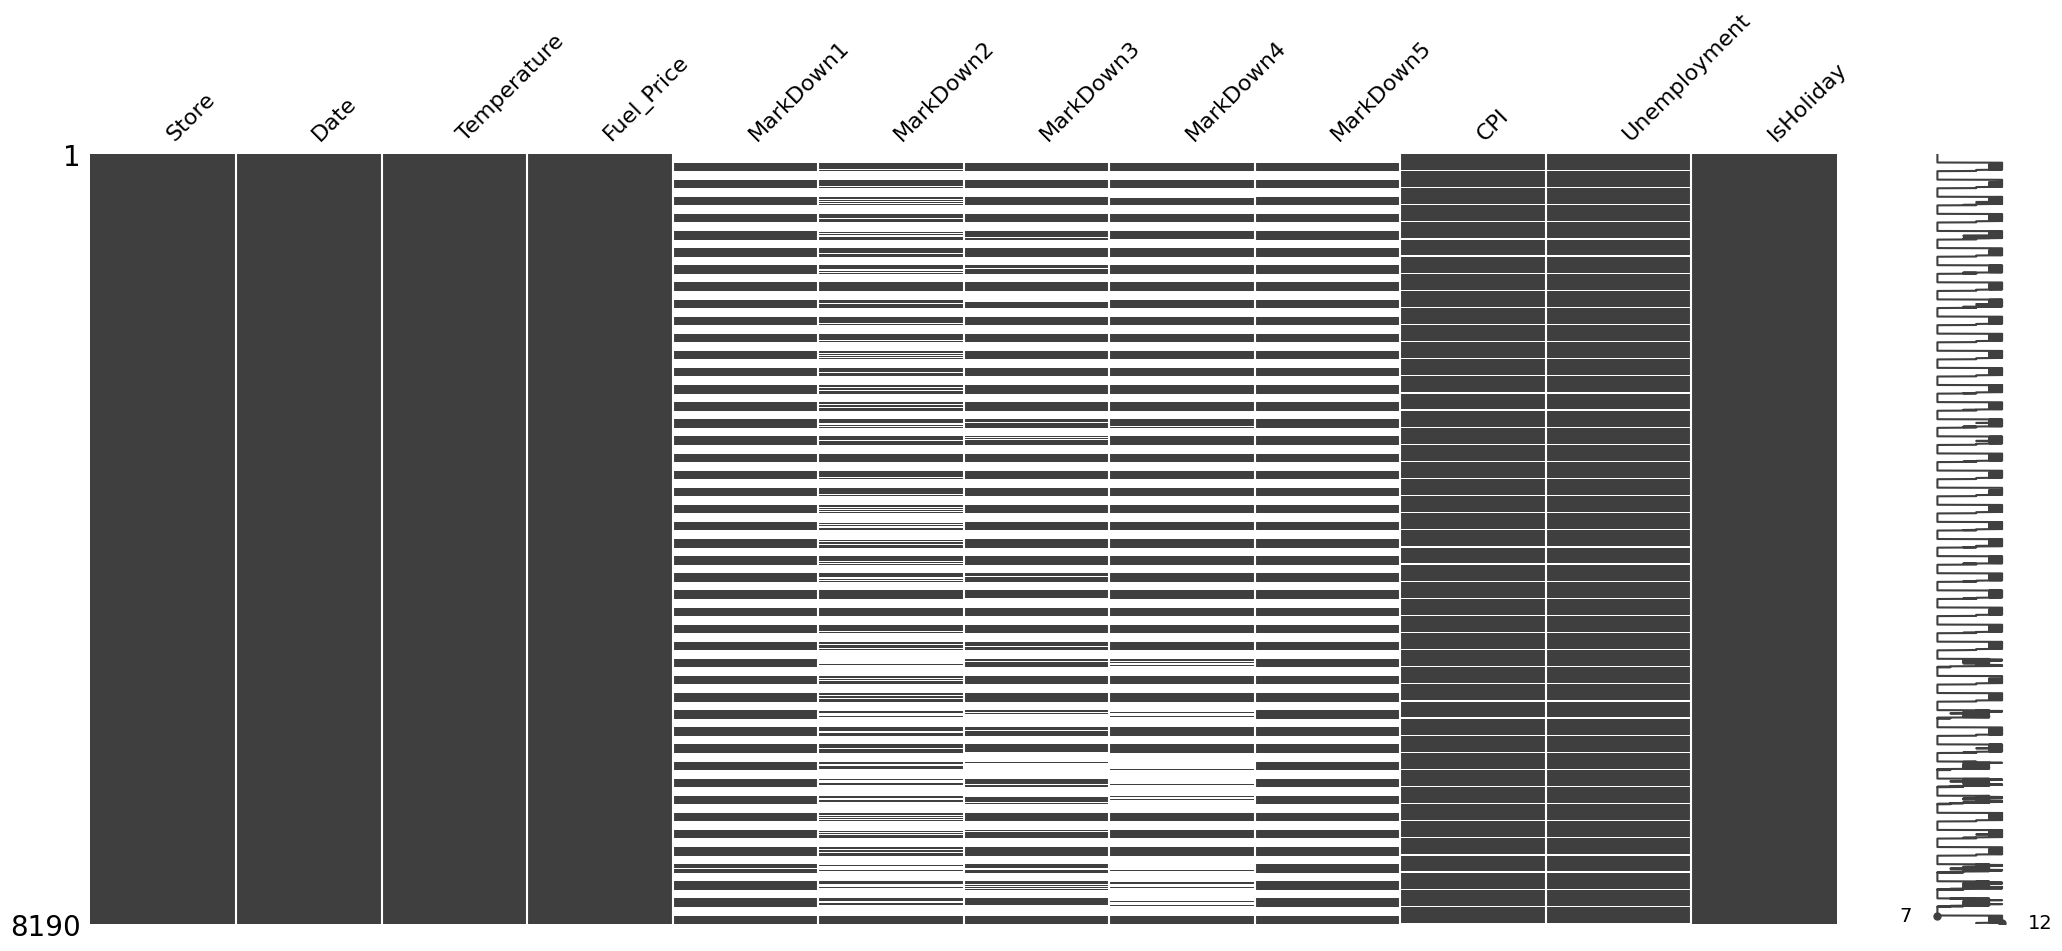

In [29]:
import missingno as msno

msno.matrix(df_features)

<Axes: >

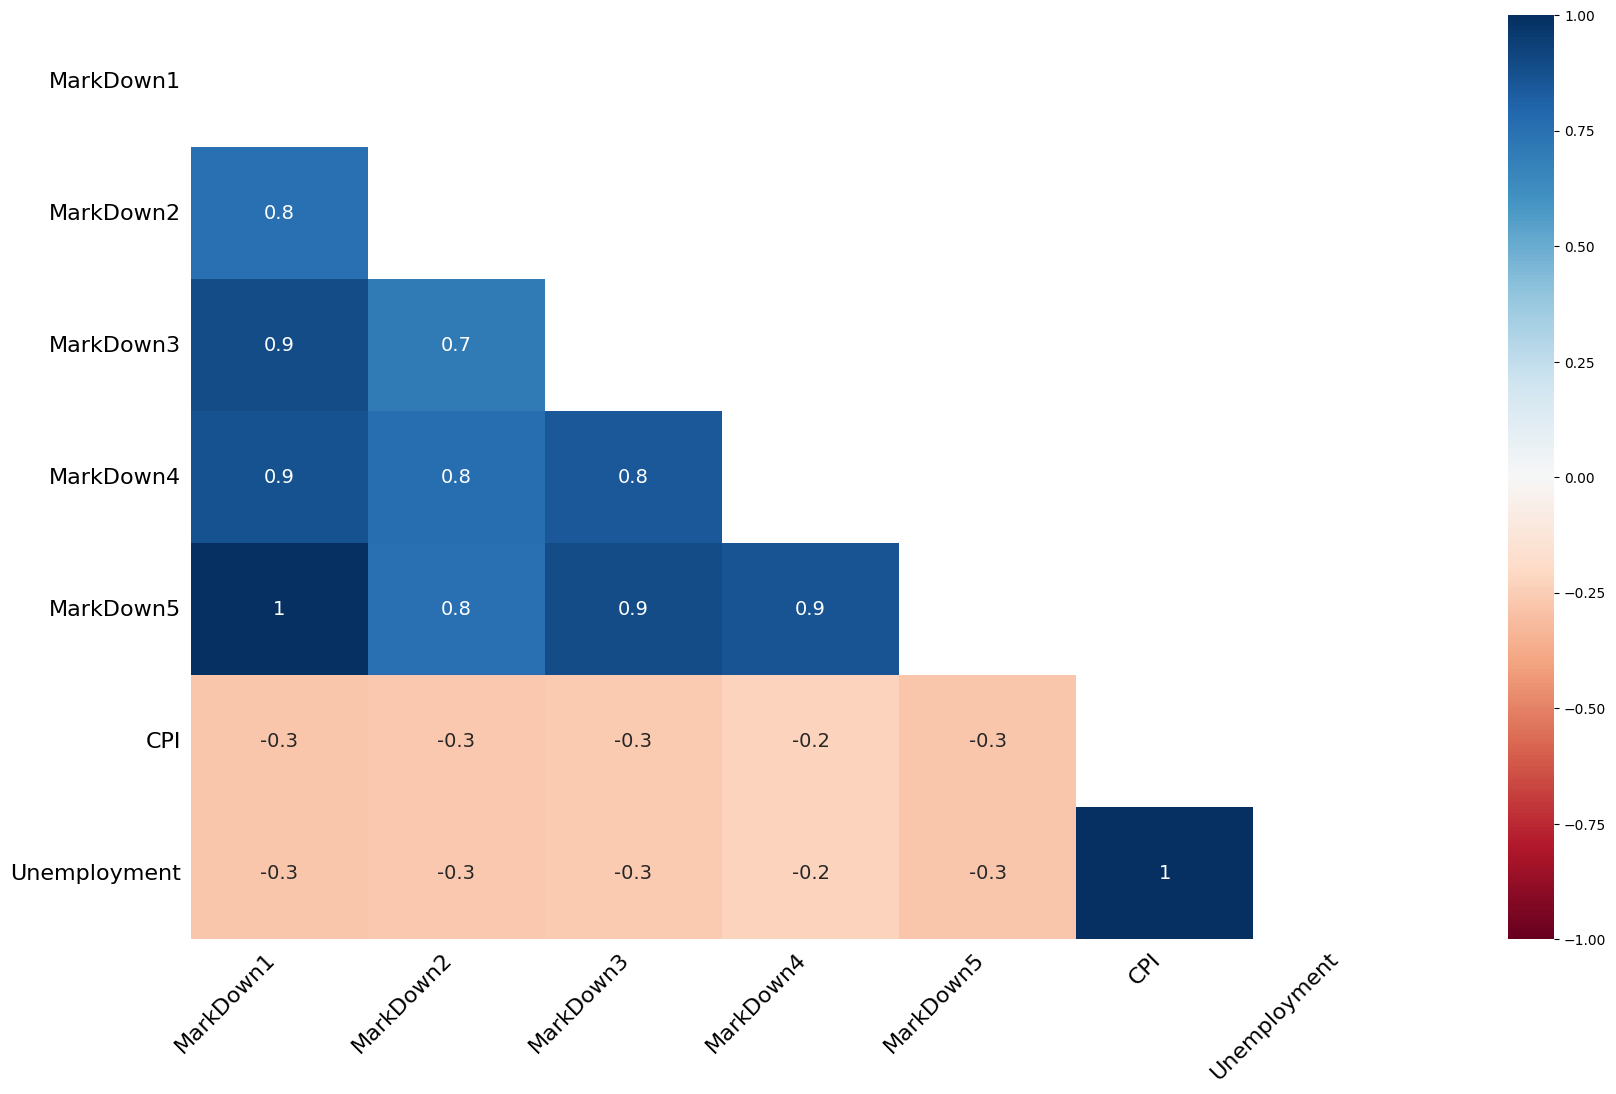

In [30]:
msno.heatmap(df_features)

In [31]:
df_features["MarkDown1"] = df_features["MarkDown1"].fillna(0)
df_features["MarkDown2"] = df_features["MarkDown2"].fillna(0)
df_features["MarkDown3"] = df_features["MarkDown3"].fillna(0)
df_features["MarkDown4"] = df_features["MarkDown4"].fillna(0)
df_features["MarkDown5"] = df_features["MarkDown5"].fillna(0)

<Axes: >

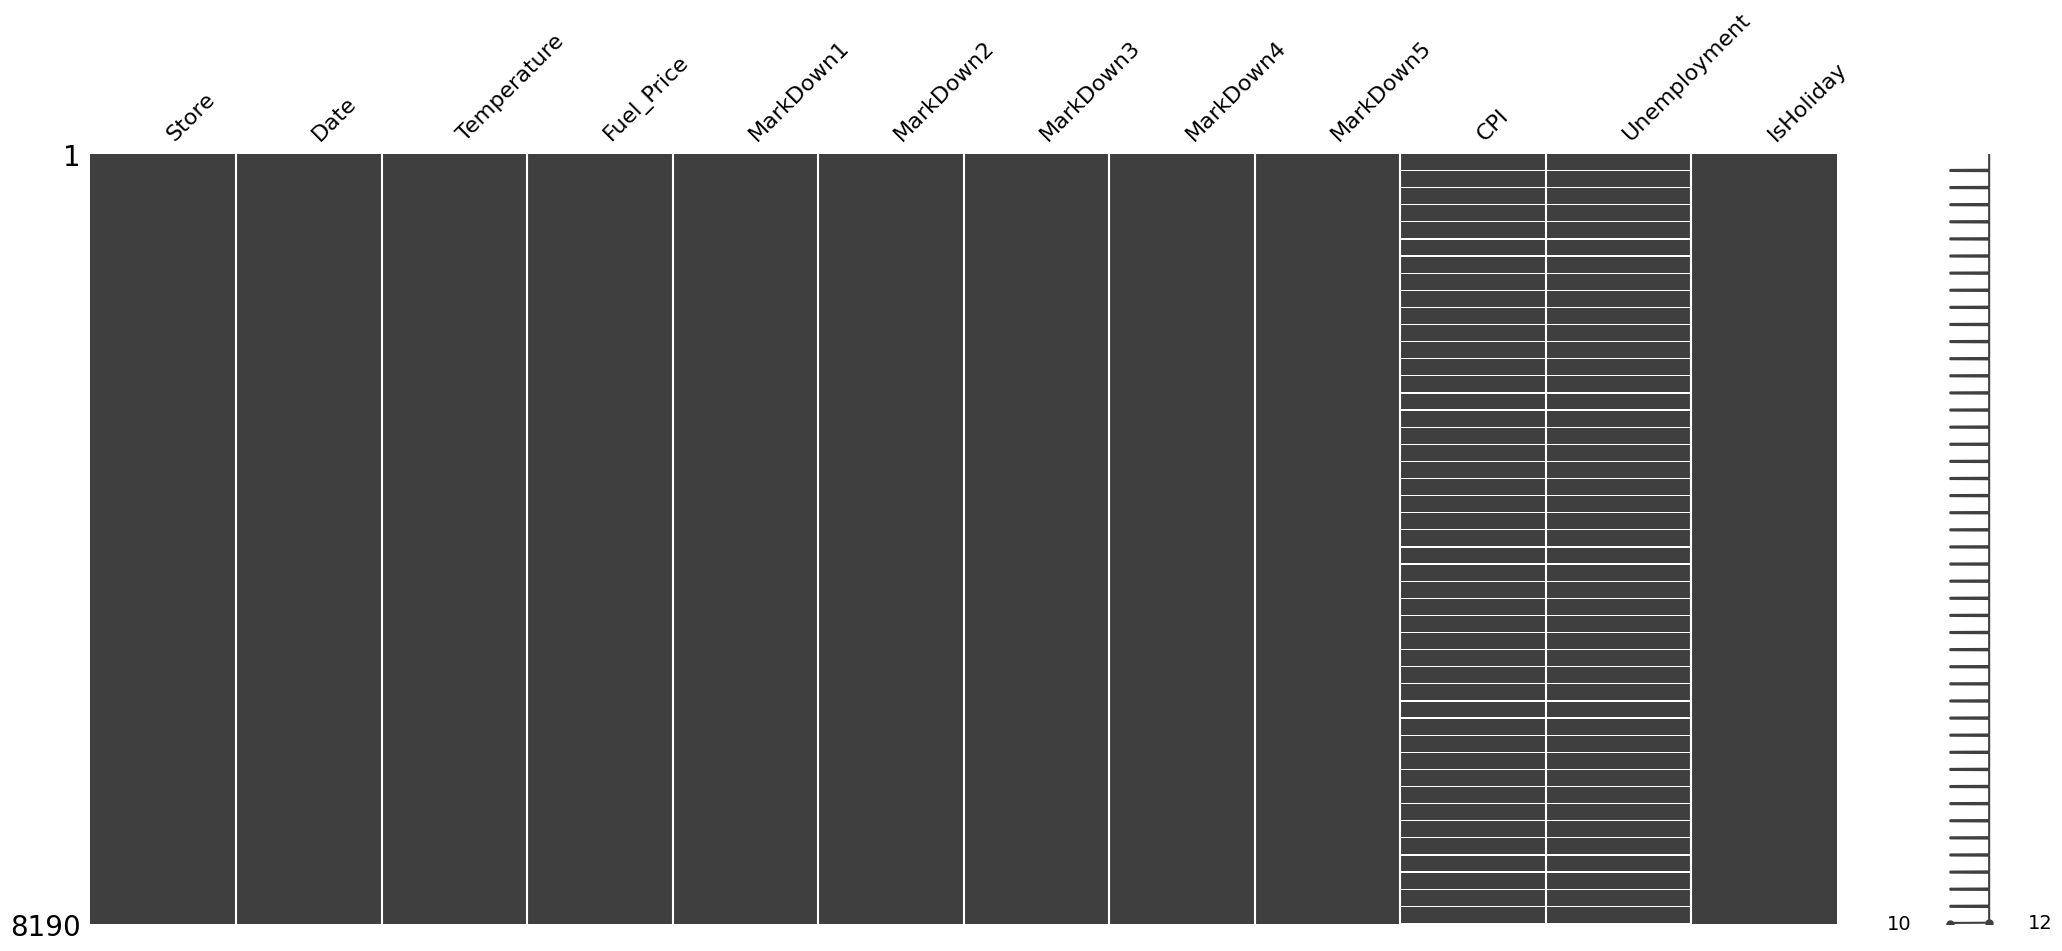

In [32]:
msno.matrix(df_features)

In [33]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)

imputed_data = imp.fit_transform(df_features[["CPI","Unemployment"]])

In [34]:
df_features = df_features.drop(columns=["CPI", "Unemployment"])
df_features[["CPI", "Unemployment"]] = imputed_data

<Axes: >

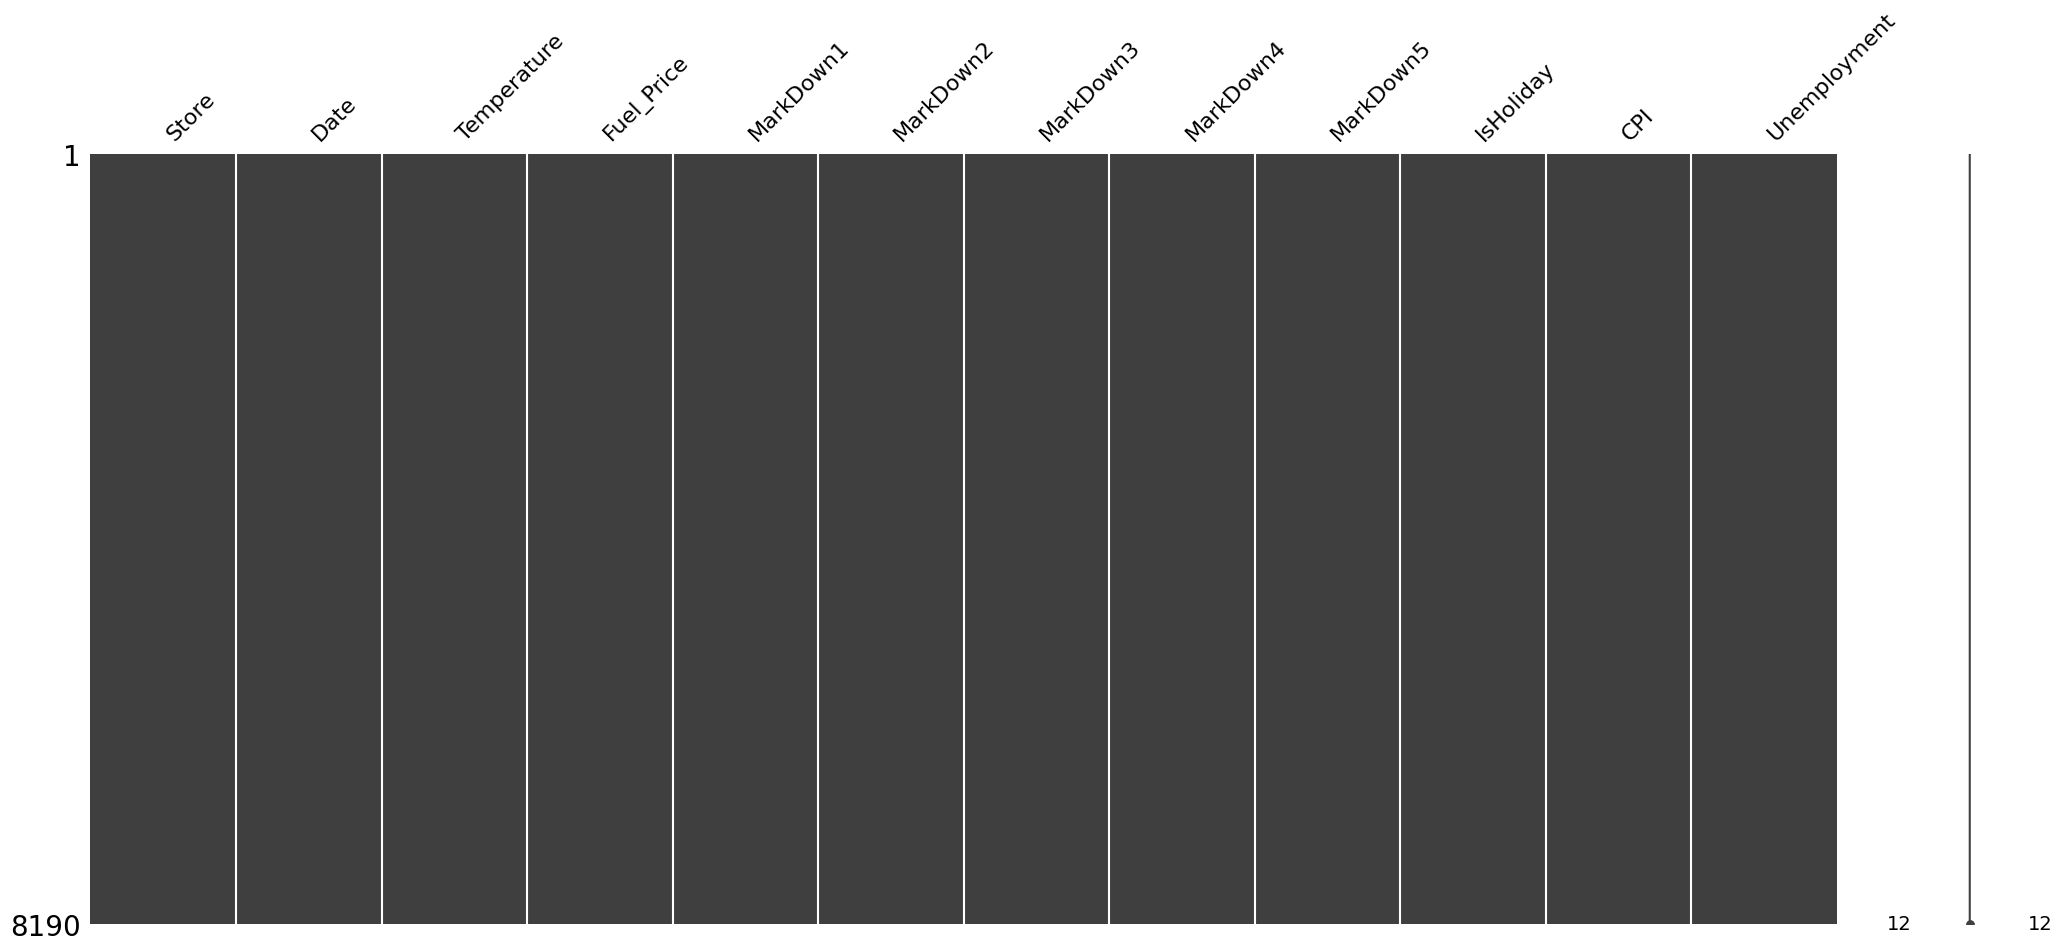

In [35]:
msno.matrix(df_features)

# Joining Data

In [36]:
df_select_features = df_features[['Store','Date','Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']]

df_train_with_feat = pd.merge(df_train, df_select_features, on=['Store', 'Date'], how='left')
print(df_train_with_feat.head())


   Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     1  2010-02-12      46039.49       True        38.51       2.548   
2      1     1  2010-02-19      41595.55      False        39.93       2.514   
3      1     1  2010-02-26      19403.54      False        46.63       2.561   
4      1     1  2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0        0.0        0.0  211.289143   
3        0.0        0.0        0.0        0.0        0.0  211.319643   
4        0.0        0.0        0.0        0.0        0.0  211.350143   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.10

In [37]:
df_test_with_feat = pd.merge(df_test, df_select_features, on=['Store', 'Date'], how='left')
print(df_test_with_feat.head())

   Store  Dept        Date  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0      1     1  2012-11-02      False        55.32       3.386    6766.44   
1      1     1  2012-11-09      False        61.24       3.314   11421.32   
2      1     1  2012-11-16      False        52.92       3.252    9696.28   
3      1     1  2012-11-23       True        56.23       3.211     883.59   
4      1     1  2012-11-30      False        52.34       3.207    2460.03   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0    5147.70      50.82    3639.90    2737.42  223.462779         6.573  
1    3370.89      40.28    4646.79    6154.16  223.481307         6.573  
2     292.10     103.78    1133.15    6612.69  223.512911         6.573  
3       4.17   74910.32     209.91     303.32  223.561947         6.573  
4       0.00    3838.35     150.57    6966.34  223.610984         6.573  


# Save files

In [38]:
df_train_with_feat.to_parquet("train_feat.parquet", index=False, engine='pyarrow')
df_test_with_feat.to_parquet("test_feat.parquet", index=False, engine='pyarrow')

In [39]:
df_train_with_feat.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')